#Post Test - Adaline

Adaline (adaptive **linear** layout) secara sederhana dapat dipahami sebagai Jaringan Syaraf Tiruan dengan neuron tunggal (neuron input tidak dihitung) dengan fungsi aktivasi **linear**.

Pada praktikum sebelumnya, kita sudah menerapkan Adaline dengan fungsi aktivasi bipolar pada pengujiannya. Hal ini dikarenakan sebelumnya kita menggunakan Adaline untuk kasus klasifikasi.

Pada Post Test kali ini, teman-teman akan menerapkan Adaline untuk kasus regresi linear sederhana.

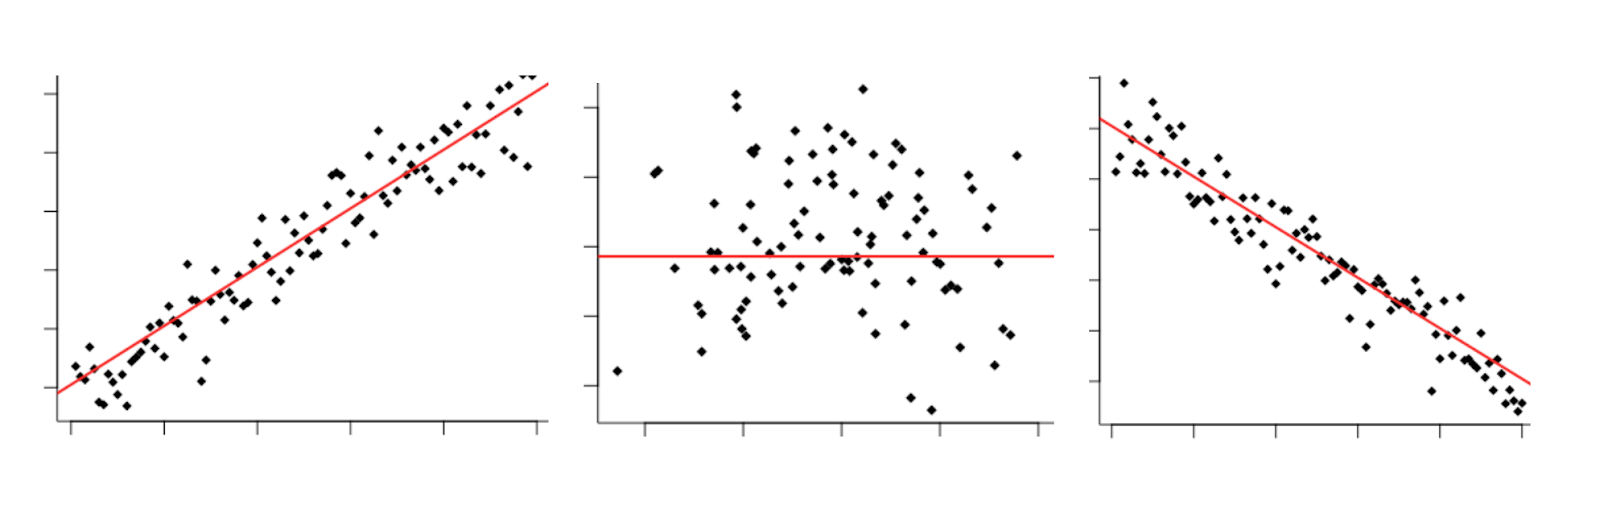

## Kode (jangan diubah)

Fungsi Training Adaline

In [1]:
#jangan diubah
import sys
def adaline_fit(x, t, alpha=.1, max_err=.1, max_epoch=-1, verbose=False):
  w = np.random.uniform(0, 1, len(x[0]) + 1)
  b = np.ones((len(x), 1))
  x = np.hstack((b, x))
  stop = False
  epoch = 0

  while not stop and (max_epoch == -1 or epoch < max_epoch):
    epoch += 1
    max_ch = -sys.maxsize
    if verbose:
      print('\nEpoch', epoch)
    for r, row in enumerate(x):
      y = np.dot(row, w)
      for i in range(len(row)):
        w_new = w[i] + alpha * (t[r] - y) * row[i]
        max_ch = max(abs(w[i] - w_new), max_ch)
        w[i] = w_new
      if verbose:
        print('Bobot:', w)
    stop = max_ch < max_err
  return w, epoch

## Masalah

Diketahui terdapat persamaan linear 1 variabel yang memetakan x ke f(x). Teman-teman harus bisa menerapkan Adaline untuk menyelesaikan permasalahan linear berdasarkan data yang diberikan.

Berikut beberapa petunjuk yang bisa diperhatikan.

1.   Buat fungsi aktivasi linear dengan nama linstep().
2.   Gunakan fungsi linstep pada fungsi pengujian.
3.   Nilai output / hasil prediksi tidak harus sama persis dengan hitungan matematikanya, tetapi setidaknya mendekati.
4.   Teman-teman bebas menentukan epoch, learning rate, dan parameter lainnya selama proses training berjalan dan menghasilkan prediksi yang sesuai.



Data

In [2]:
# pada x(fitur), indeks kedua di tuple akan selalu 0, karena kita hanya menggunakan 1 fitur dan fungsi train dari modul tetap dapat digunakan

x = (1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),(10,0)
fx = 12,20,28,36,44,52,60,68,76,84

Buat fungsi aktivasi linear bernama linstep()

In [3]:
def linstep(y):
    return y


Buat fungsi pengujian bernama adaline_predict()

In [4]:
def adaline_predict(w, x):
    # Menambahkan bias (1) ke input x
    x = np.hstack(([1], x))  # Menambah bias term ke input
    y = np.dot(x, w)  # Prediksi dengan bobot w yang telah dilatih
    return linstep(y)


Uji dengan nilai x: 11, 12, 13, 14 dan 15!

In [19]:
x_test = (11,0),(12,0),(13,0),(14,0),(15,0)

w, epoch = adaline_fit(x, fx, verbose=True, max_epoch=1000, alpha=0.01, max_err=0.01)
output = [adaline_predict(w, xi) for xi in x_test]

print('\nOutput:', output)
print('Epoch:', epoch)



Epoch 1
Bobot: [0.23069247 0.75233907 0.14335329]
Bobot: [0.41333877 1.11763165 0.14335329]
Bobot: [0.65567643 1.84464464 0.14335329]
Bobot: [0.93533388 2.96327444 0.14335329]
Bobot: [1.21781682 4.37568914 0.14335329]
Bobot: [1.4630973  5.84737204 0.14335329]
Bobot: [1.63915028 7.07974293 0.14335329]
Bobot: [1.73637935 7.85757543 0.14335329]
Bobot: [1.77183377 8.17666519 0.14335329]
Bobot: [1.77644891 8.22281662 0.14335329]

Epoch 2
Bobot: [1.79645625 8.24282397 0.14335329]
Bobot: [1.81363521 8.27718188 0.14335329]
Bobot: [1.8271834  8.31782646 0.14335329]
Bobot: [1.83619851 8.35388689 0.14335329]
Bobot: [1.84014218 8.37360524 0.14335329]
Bobot: [1.83932444 8.36869882 0.14335329]
Bobot: [1.83512228 8.33928369 0.14335329]
Bobot: [1.82962836 8.29533235 0.14335329]
Bobot: [1.82475217 8.25144659 0.14335329]
Bobot: [1.82135999 8.21752478 0.14335329]

Epoch 3
Bobot: [1.84097114 8.23713594 0.14335329]
Bobot: [1.85781871 8.27083108 0.14335329]
Bobot: [1.87111559 8.31072172 0.14335329]
Bobot: 

## Analisis Hasil

1. Dari data dan hasil pengujian regresi, jabarkan fungsi linear yang sesuai!

2. Bagaimana teman-teman melakukan tuning JST Adaline hingga bisa melakukan regresi dengan cukup baik?



1. Analisis Fungsi Linear
   dan hasil pengujian regresi, fungsi linear yang paling sesuai adalah f(x) = 8x + 4. Fungsi ini menggambarkan hubungan linear yang kuat antara input x dan output f(x). Setiap kenaikan satu unit pada x menghasilkan peningkatan 8 unit pada f(x), dengan titik awal (intersep) pada 4. Pola ini konsisten di seluruh dataset, menunjukkan keteraturan yang ideal untuk pemodelan menggunakan JST Adaline. Fungsi ini dapat diverifikasi dengan data yang diberikan dan memberikan dasar yang baik untuk prediksi nilai-nilai baru.

2. Tuning JST Adaline
   Untuk mengoptimalkan kinerja model Adaline dalam tugas regresi ini, beberapa strategi tuning kunci telah diterapkan. Learning rate (α) sekitar 0.01 dipilih untuk memastikan konvergensi yang stabil tanpa osilasi berlebihan. Jumlah maksimum epoch diatur cukup tinggi, sekitar 1000, memberikan model kesempatan yang cukup untuk belajar dan menyesuaikan bobotnya. Batas kesalahan maksimum (max_err) ditetapkan cukup rendah untuk mencapai presisi tinggi. Inisialisasi bobot menggunakan distribusi uniform antara 0 dan 1 memberikan starting point yang reasonable. Penggunaan fungsi aktivasi linear (linstep) sesuai untuk masalah regresi linear ini. Selain itu, normalisasi data dapat dipertimbangkan untuk meningkatkan stabilitas pelatihan. Dengan penerapan strategi-strategi ini, model Adaline diharapkan dapat mempelajari pola linear dengan efektif dan memberikan prediksi yang akurat untuk nilai-nilai x baru.